In [1]:
import os
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import omicverse as ov
import scvi
from scvi.model.utils import mde

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.3, Tutorials: https://omicverse.readthedocs.io/


[rank: 0] Global seed set to 0


In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)
sc.set_figure_params(dpi=100)
sc.set_figure_params(figsize=(3, 3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (3, 3)

In [3]:
# Change the working directory to the Garfield folder (if needed)
os.chdir('/storage/liuxiaodongLab/fanxueying/mayanalysis/embryomodel_integration')
os.getcwd()

'/storage/liuxiaodongLab/fanxueying/mayanalysis/embryomodel_integration'

In [4]:
# Load dataset
os.chdir("/storage/liuxiaodongLab/fanxueying/mayanalysis/2024Aug")
adata = sc.read('embryo_pre_post_20250310.h5ad')
adata

AnnData object with n_obs × n_vars = 35120 × 45796
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'reanno', 'lineage', 'unicorns', 'combined_annotation', 'final_anno', 'final_lineage', 'dataset'
    layers: 'counts'

In [5]:
print(set(adata.obs["final_lineage"]))

{'Notochord', 'Endoderm', 'TE_TrB', 'ExE_endo', 'non_neuro_ecto', 'Inner Cell Mass', 'Late epiblast', '8C', 'Morula', 'Trophectoderm', 'Gastru', 'Primitive Endoderm', 'mesoderm', 'Prelineage', 'Exe_meso', 'PGC', 'hemogenic', 'neural_ecto', 'epi', 'Epiblast'}


In [6]:
# fix lineage names
lineage_mapping = {
    "Late epiblast": "epi",
    "Epiblast": "epi",
    "Primitive Endoderm": "ExE_endo",
    "Trophectoderm": "TE_TrB"
}

# Replace values in the final_lineage column
adata.obs["final_lineage"] = adata.obs["final_lineage"].replace(lineage_mapping)

# Print unique values to check the updated categories
print(set(adata.obs["final_lineage"]))



{'Endoderm', 'Morula', 'TE_TrB', 'Notochord', 'hemogenic', 'Gastru', 'mesoderm', 'neural_ecto', 'Prelineage', 'ExE_endo', 'non_neuro_ecto', 'epi', 'Exe_meso', 'Inner Cell Mass', '8C', 'PGC'}


In [7]:
print(set(adata.obs["orig.ident"]))

{'Petropoulos_2016', 'mole', 'tyser', 'zhou', 'Yan_2013', 'Ai', 'Yanagida_2021', 'Xue_2013', 'Xiang_2020', 'xiang', 'zeng'}


In [8]:
adata = adata[adata.obs["orig.ident"] != "Xiang_2020"].copy()

In [9]:
print(adata.X)

  (0, 2019)	0.0855016865466988
  (0, 3737)	0.16426518125366685
  (0, 1921)	0.5896574616062754
  (0, 1922)	0.0855016865466988
  (0, 1924)	0.36902031975322847
  (0, 1925)	0.5896574616062754
  (0, 1928)	0.16426518125366685
  (0, 2026)	0.3053158743576146
  (0, 3353)	0.5896574616062754
  (0, 3354)	0.16426518125366685
  (0, 3357)	0.8107913523998501
  (0, 3373)	0.16426518125366685
  (0, 3960)	0.42890841421185777
  (0, 3374)	0.42890841421185777
  (0, 3379)	0.0855016865466988
  (0, 3380)	1.7765590110647602
  (0, 2731)	0.23727538121151837
  (0, 3961)	0.16426518125366685
  (0, 1576)	1.394995284765954
  (0, 1580)	0.5388923546781661
  (0, 4051)	0.5896574616062754
  (0, 2369)	0.3053158743576146
  (0, 2370)	1.394995284765954
  (0, 1868)	0.36902031975322847
  (0, 1633)	0.23727538121151837
  :	:
  (34788, 45745)	0.6389133334159851
  (34788, 45746)	0.047234512865543365
  (34788, 45747)	0.019764713943004608
  (34788, 45749)	0.9483906030654907
  (34788, 45750)	1.9599474668502808
  (34788, 45753)	1.1796782

In [10]:
print(adata.layers["counts"])

  (0, 2019)	1.0
  (0, 3737)	2.0
  (0, 1921)	9.0
  (0, 1922)	1.0
  (0, 1924)	5.0
  (0, 1925)	9.0
  (0, 1928)	2.0
  (0, 2026)	4.0
  (0, 3353)	9.0
  (0, 3354)	2.0
  (0, 3357)	14.0
  (0, 3373)	2.0
  (0, 3960)	6.0
  (0, 3374)	6.0
  (0, 3379)	1.0
  (0, 3380)	55.0
  (0, 2731)	3.0
  (0, 3961)	2.0
  (0, 1576)	34.0
  (0, 1580)	8.0
  (0, 4051)	9.0
  (0, 2369)	4.0
  (0, 2370)	34.0
  (0, 1868)	5.0
  (0, 1633)	3.0
  :	:
  (34788, 45745)	1165.0
  (34788, 45746)	63.0
  (34788, 45747)	26.0
  (34788, 45749)	2060.0
  (34788, 45750)	7944.0
  (34788, 45753)	2935.0
  (34788, 45756)	58.0
  (34788, 45757)	47.0
  (34788, 45760)	152137.0
  (34788, 45762)	400793.0
  (34788, 45764)	238686.0
  (34788, 45767)	1.0
  (34788, 45768)	241173.0
  (34788, 45774)	300634.0
  (34788, 45775)	1.0
  (34788, 45777)	198534.0
  (34788, 45779)	1430.0
  (34788, 45780)	112760.0
  (34788, 45781)	86808.0
  (34788, 45783)	1974.0
  (34788, 45785)	14361.0
  (34788, 45786)	463016.0
  (34788, 45790)	45849.0
  (34788, 45791)	11543.0
  (34788

In [11]:
adata.X = adata.layers["counts"].copy()

In [12]:
sc.settings.seed = 42
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor="cell_ranger", batch_key="orig.ident")
sc.tl.pca(adata, n_comps=30, use_highly_variable=True)

In [13]:
adata_hvg = adata[:, adata.var.highly_variable].copy()

In [14]:
adata_hvg

AnnData object with n_obs × n_vars = 34789 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'reanno', 'lineage', 'unicorns', 'combined_annotation', 'final_anno', 'final_lineage', 'dataset'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'

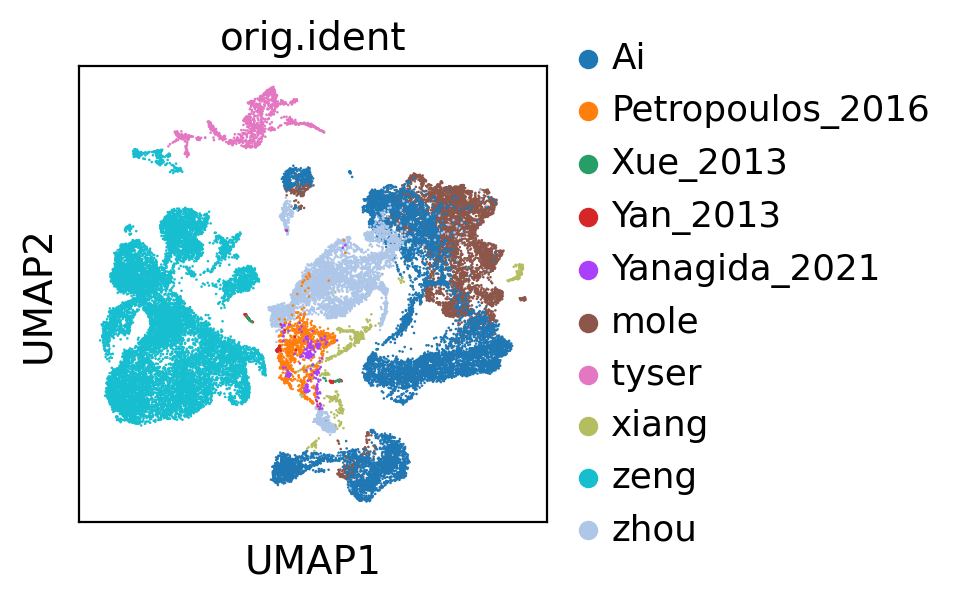

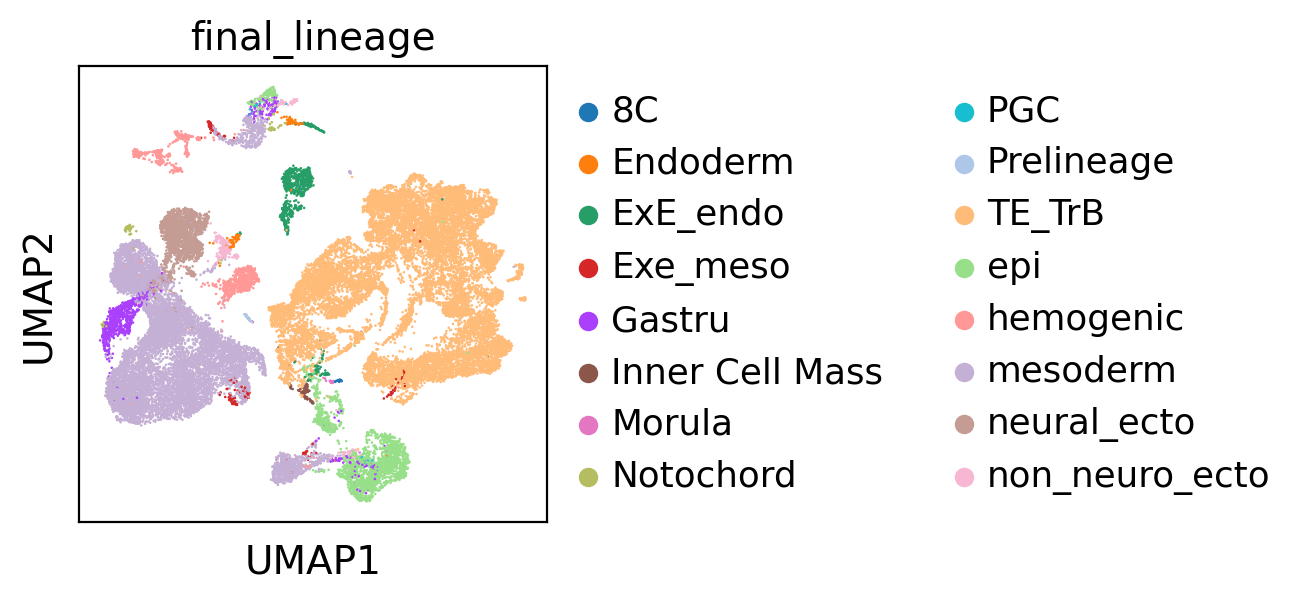

In [15]:
####Unintegrated
adata.obsm["Unintegrated"] = adata_hvg.obsm["X_pca"]
adata_hvg.obsm["Unintegrated"] = adata_hvg.obsm["X_pca"]
sc.pp.neighbors(adata, use_rep="Unintegrated",random_state=42)
sc.tl.leiden(adata, resolution=0.5,key_added=f"Unintegrated_res_0.5",random_state=42)
sc.tl.umap(adata,random_state=42)
adata.obsm['X_Unintegrated'] = adata.obsm['X_umap']
sc.pl.umap(adata, color=['orig.ident'])
sc.pl.umap(adata, color=['final_lineage'])

In [16]:
###scVI
scvi.model.SCVI.setup_anndata(adata_hvg, layer="counts", batch_key="orig.ident")
vae = scvi.model.SCVI(adata_hvg, gene_likelihood="nb", n_layers=2, n_latent=30)
vae.train()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 230/230: 100%|██████████| 230/230 [24:41<00:00,  6.41s/it, loss=1.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=230` reached.


Epoch 230/230: 100%|██████████| 230/230 [24:41<00:00,  6.44s/it, loss=1.54e+03, v_num=1]


In [17]:
adata.obsm["scVI"] = vae.get_latent_representation()

In [18]:
###scANVI
lvae = scvi.model.SCANVI.from_scvi_model(
    vae,
    adata=adata_hvg,
    labels_key="final_lineage",
    unlabeled_category="Unknown",
)
lvae.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 20/20: 100%|██████████| 20/20 [03:57<00:00, 11.89s/it, loss=1.62e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [03:57<00:00, 11.88s/it, loss=1.62e+03, v_num=1]


In [19]:
adata.obsm["scANVI"] = lvae.get_latent_representation()

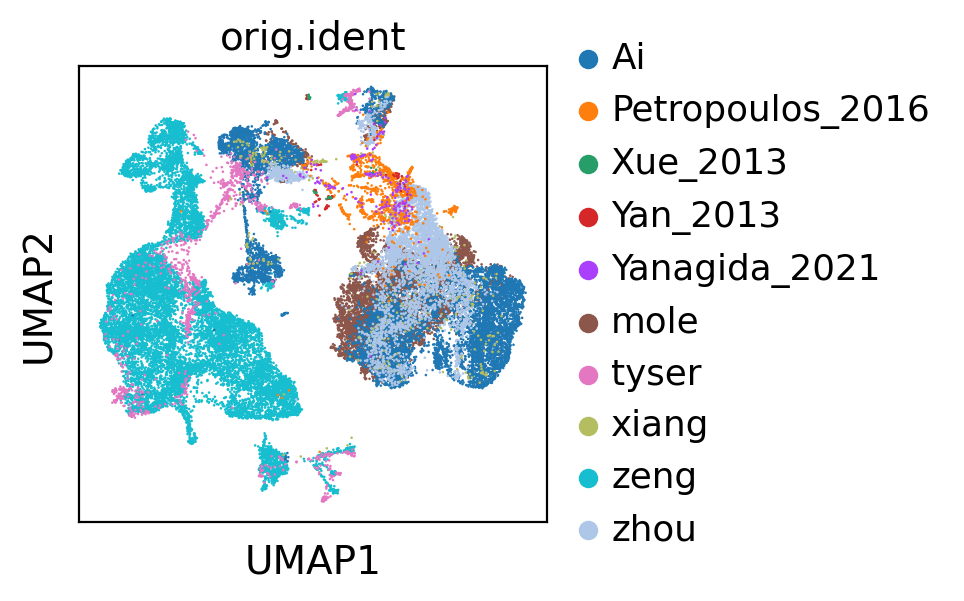

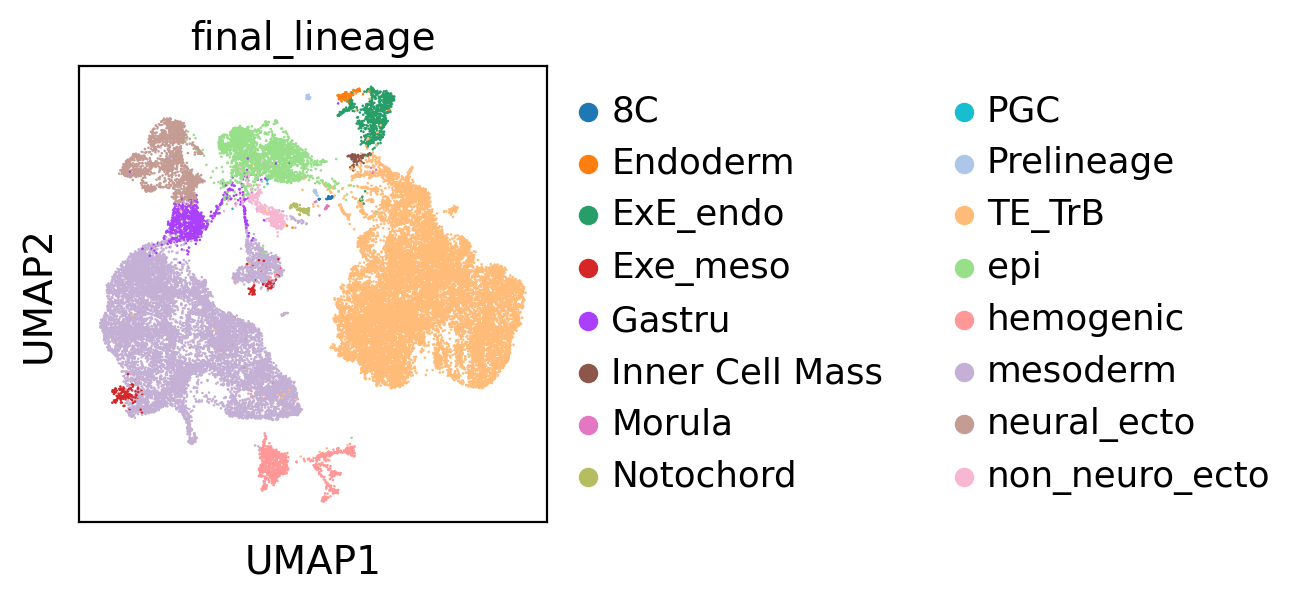

In [20]:
adata_hvg.obsm["scANVI"] = adata.obsm["scANVI"]
sc.pp.neighbors(adata, use_rep="scANVI",random_state=42)
sc.tl.leiden(adata, resolution=0.5,key_added=f"scANVI_res_0.5",random_state=42)
sc.tl.umap(adata,random_state=42)
adata.obsm['X_scANVI'] = adata.obsm['X_umap']
adata_hvg.obsm['X_scANVI'] = adata.obsm['X_scANVI']
sc.pl.umap(adata, color=['orig.ident'])
sc.pl.umap(adata, color=['final_lineage'])

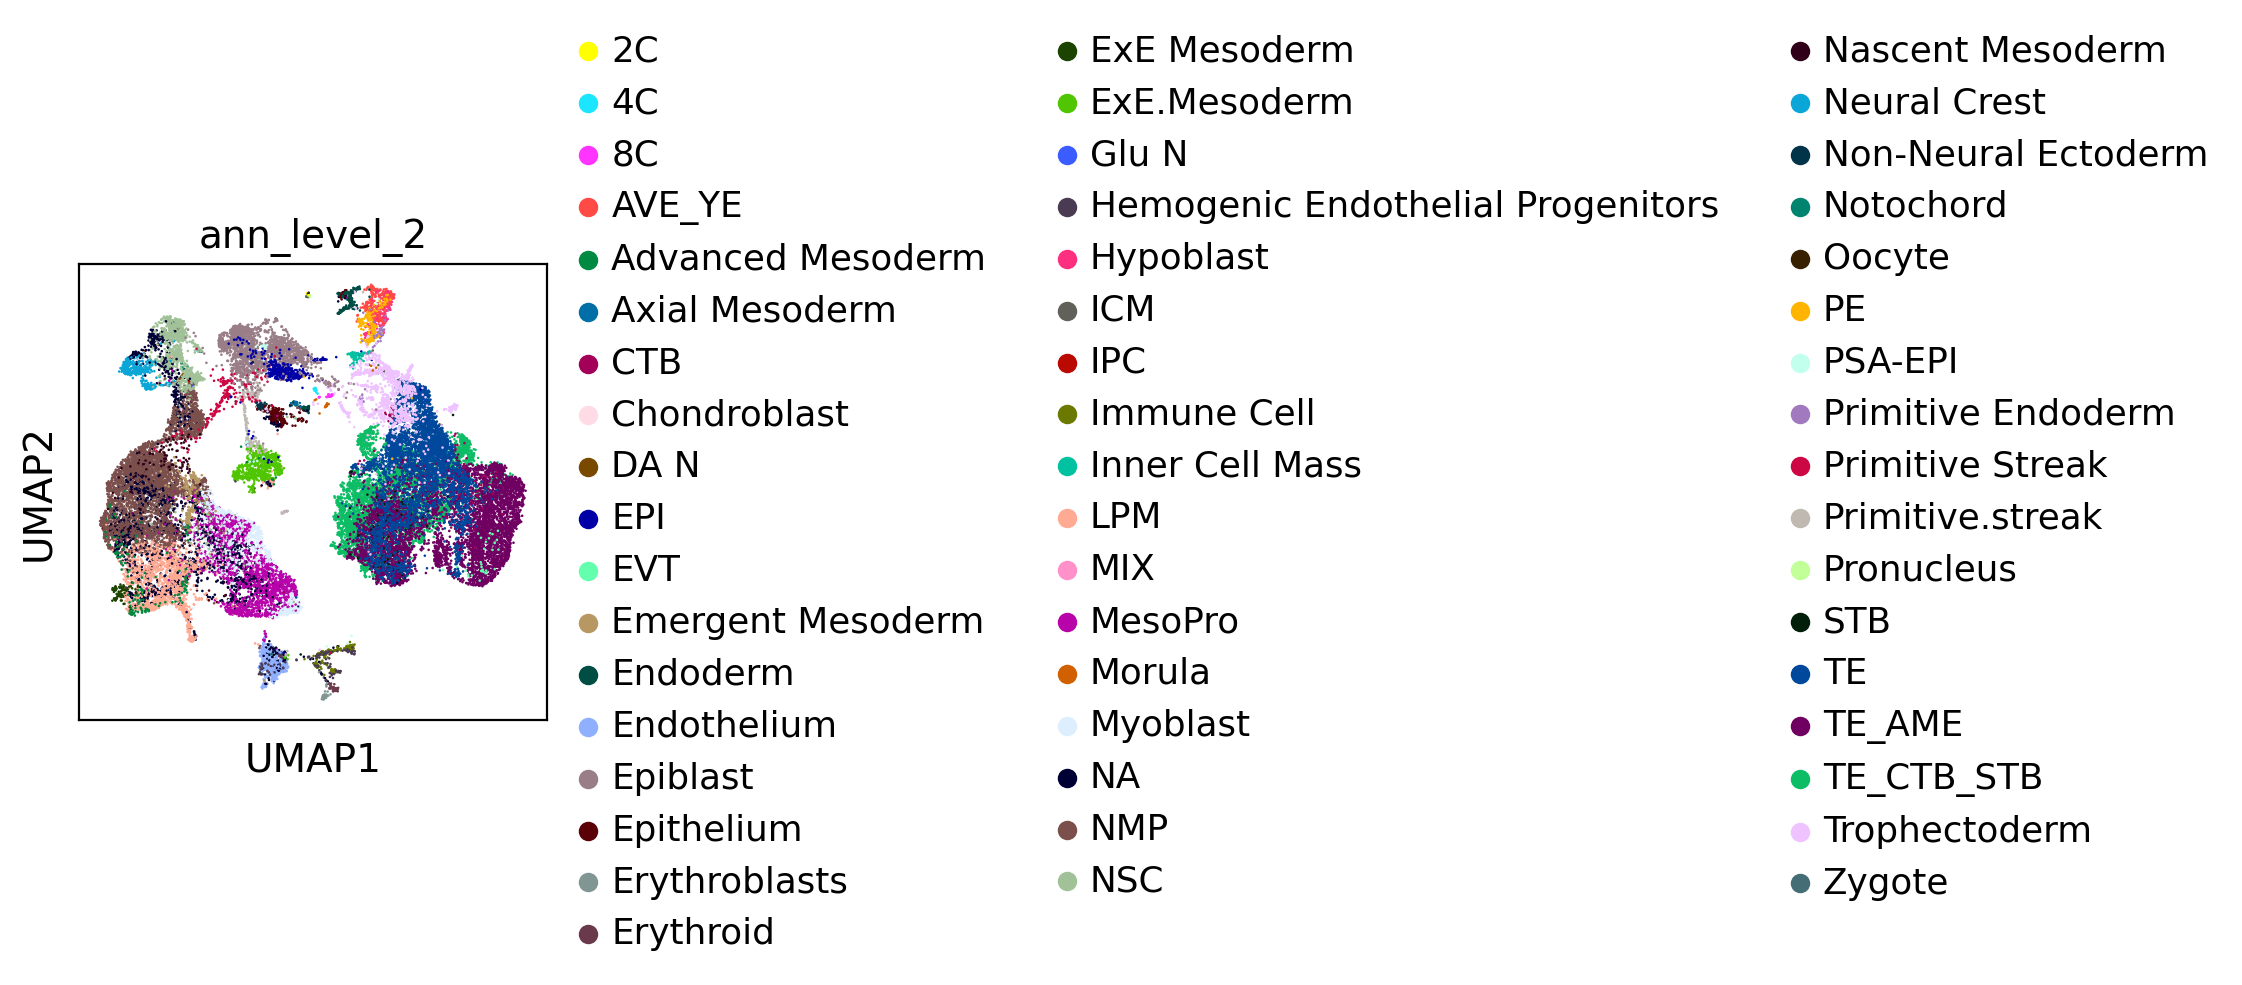

In [22]:
sc.pl.umap(adata, color=['ann_level_2'])

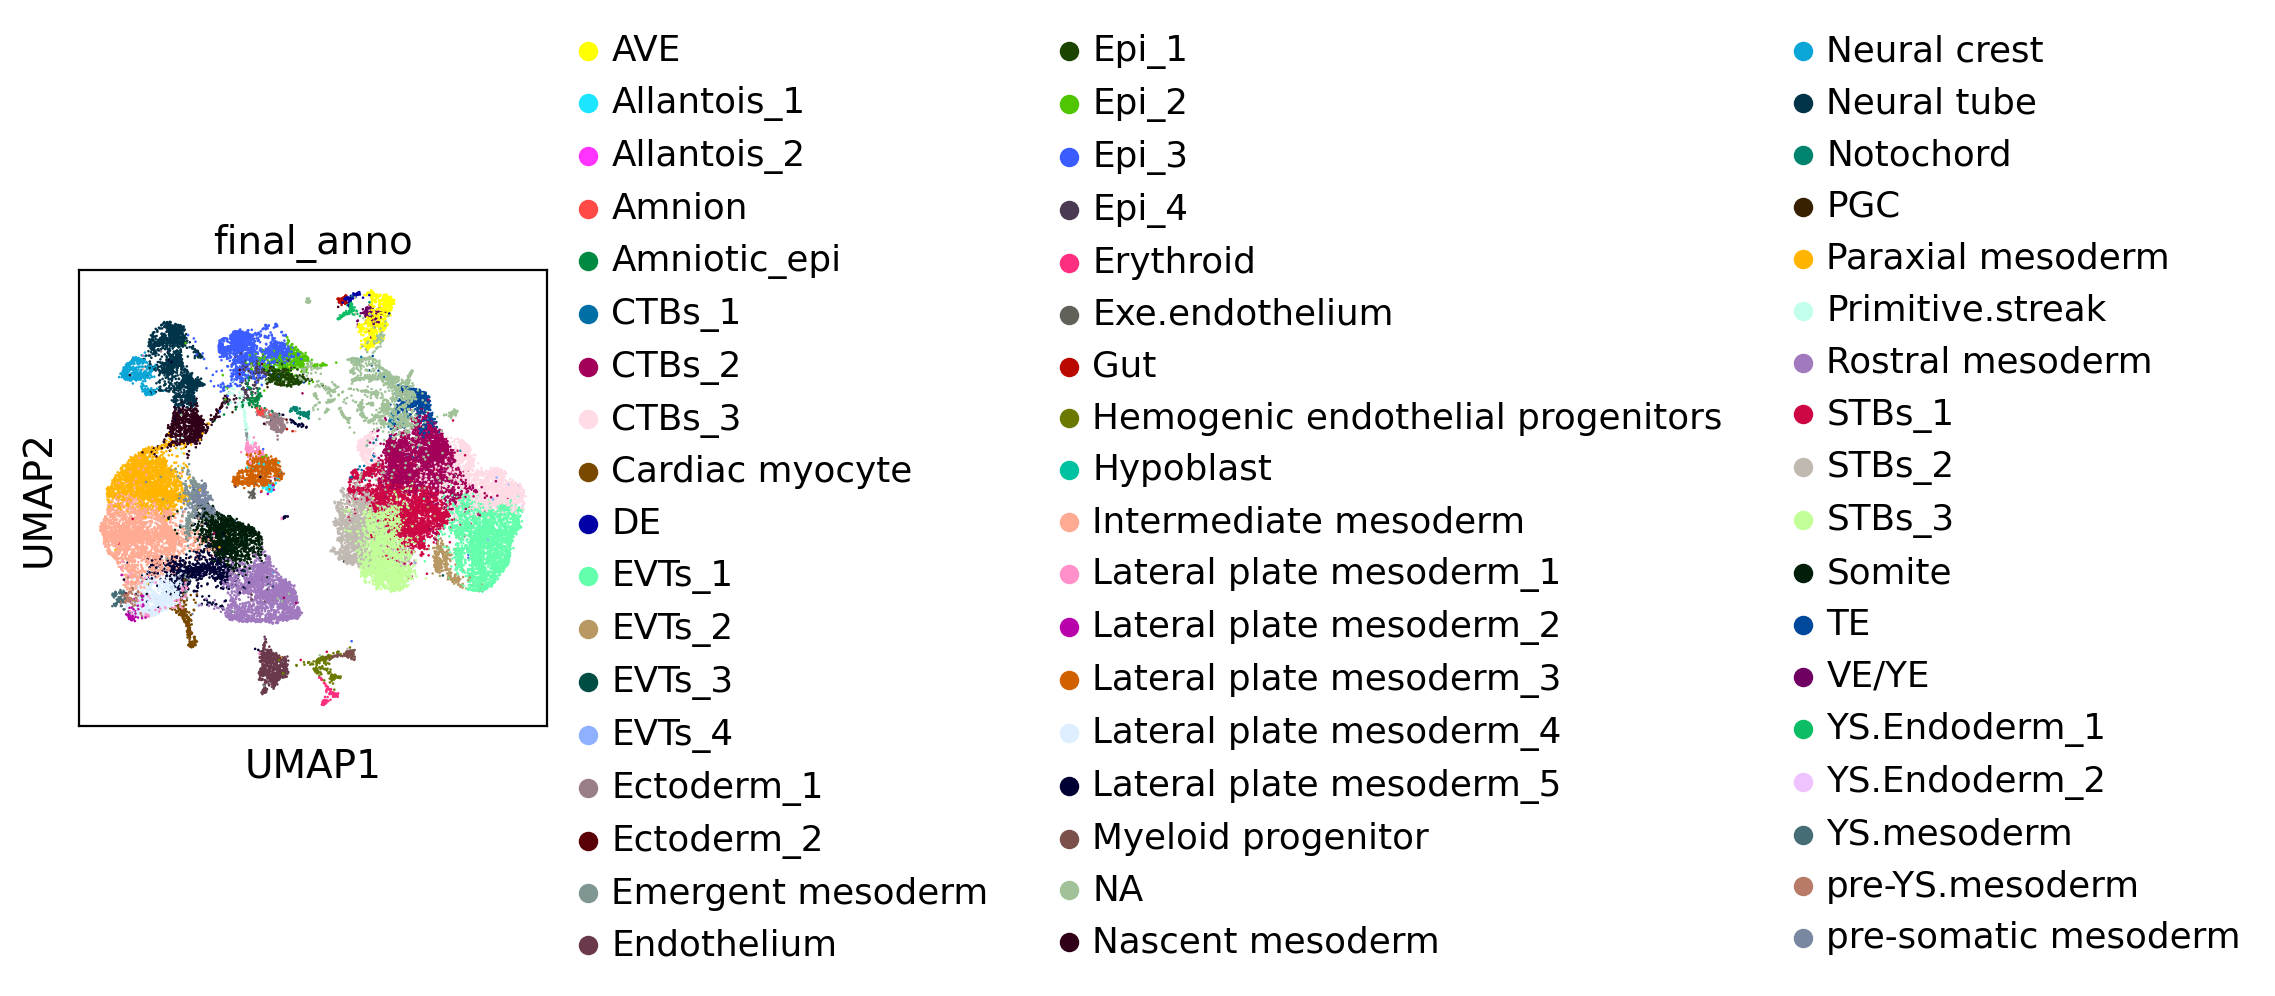

In [23]:
sc.pl.umap(adata, color=['final_anno'])

In [25]:
# Ensure the new values exist in the categories
adata.obs["final_anno"] = adata.obs["final_anno"].astype(str)  # Convert to string if categorical

# Update the values where "final_anno" is "NA"
adata.obs.loc[adata.obs["final_anno"] == "NA", "final_anno"] = adata.obs["ann_level_2"].astype(str)

# If final_anno was categorical, convert it back
adata.obs["final_anno"] = adata.obs["final_anno"].astype("category")


In [26]:
print(set(adata.obs["final_anno"]))

{'TE', 'Zygote', 'Epi_2', 'Oocyte', 'YS.Endoderm_2', 'Epi_1', 'Notochord', 'Intermediate mesoderm', 'EVTs_3', 'STBs_2', 'EVTs_4', 'pre-YS.mesoderm', 'Epi_3', 'Exe.endothelium', 'Hypoblast', 'CTBs_1', 'AVE', 'Erythroid', 'Rostral mesoderm', 'STBs_1', 'DE', 'STBs_3', 'Paraxial mesoderm', 'Amniotic_epi', 'Pronucleus', '8C', 'Inner Cell Mass', 'Epi_4', 'Hemogenic endothelial progenitors', 'Morula', 'Trophectoderm', '4C', 'Myeloid progenitor', 'Primitive Endoderm', 'EVTs_2', 'Endothelium', 'YS.Endoderm_1', 'VE/YE', 'Nascent mesoderm', 'Primitive.streak', 'Lateral plate mesoderm_5', 'Somite', 'Emergent mesoderm', 'EVTs_1', 'Allantois_2', 'PGC', 'Lateral plate mesoderm_3', 'CTBs_2', 'Cardiac myocyte', 'Ectoderm_2', 'Allantois_1', 'Lateral plate mesoderm_2', 'Ectoderm_1', '2C', 'Neural tube', 'Lateral plate mesoderm_1', 'Neural crest', 'Amnion', 'Lateral plate mesoderm_4', 'Gut', 'pre-somatic mesoderm', 'YS.mesoderm', 'Epiblast', 'CTBs_3'}


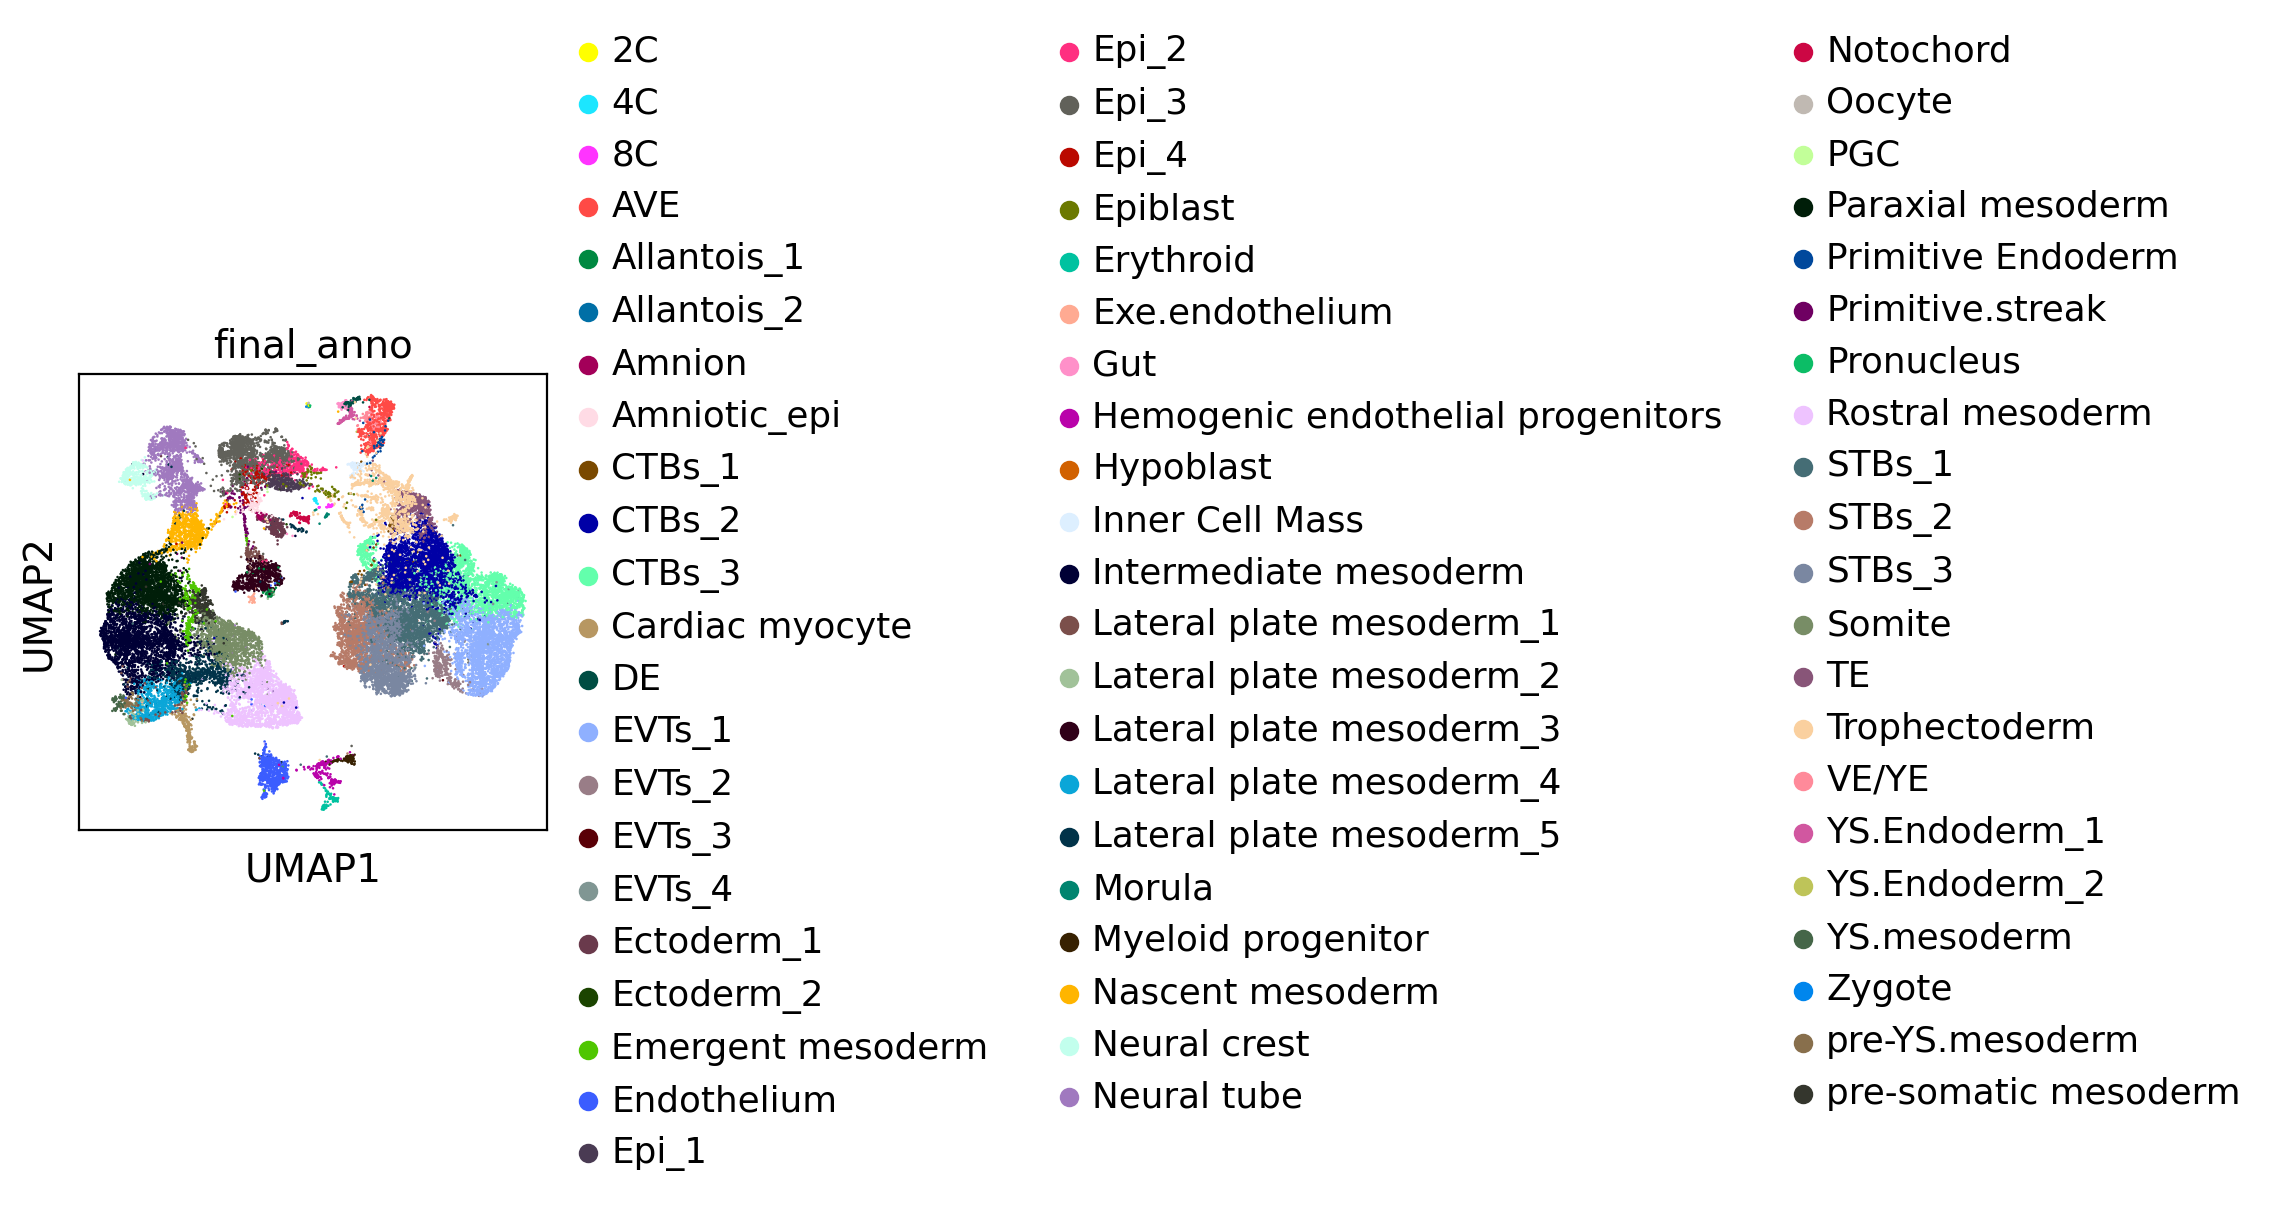

In [27]:
sc.pl.umap(adata, color=['final_anno'])

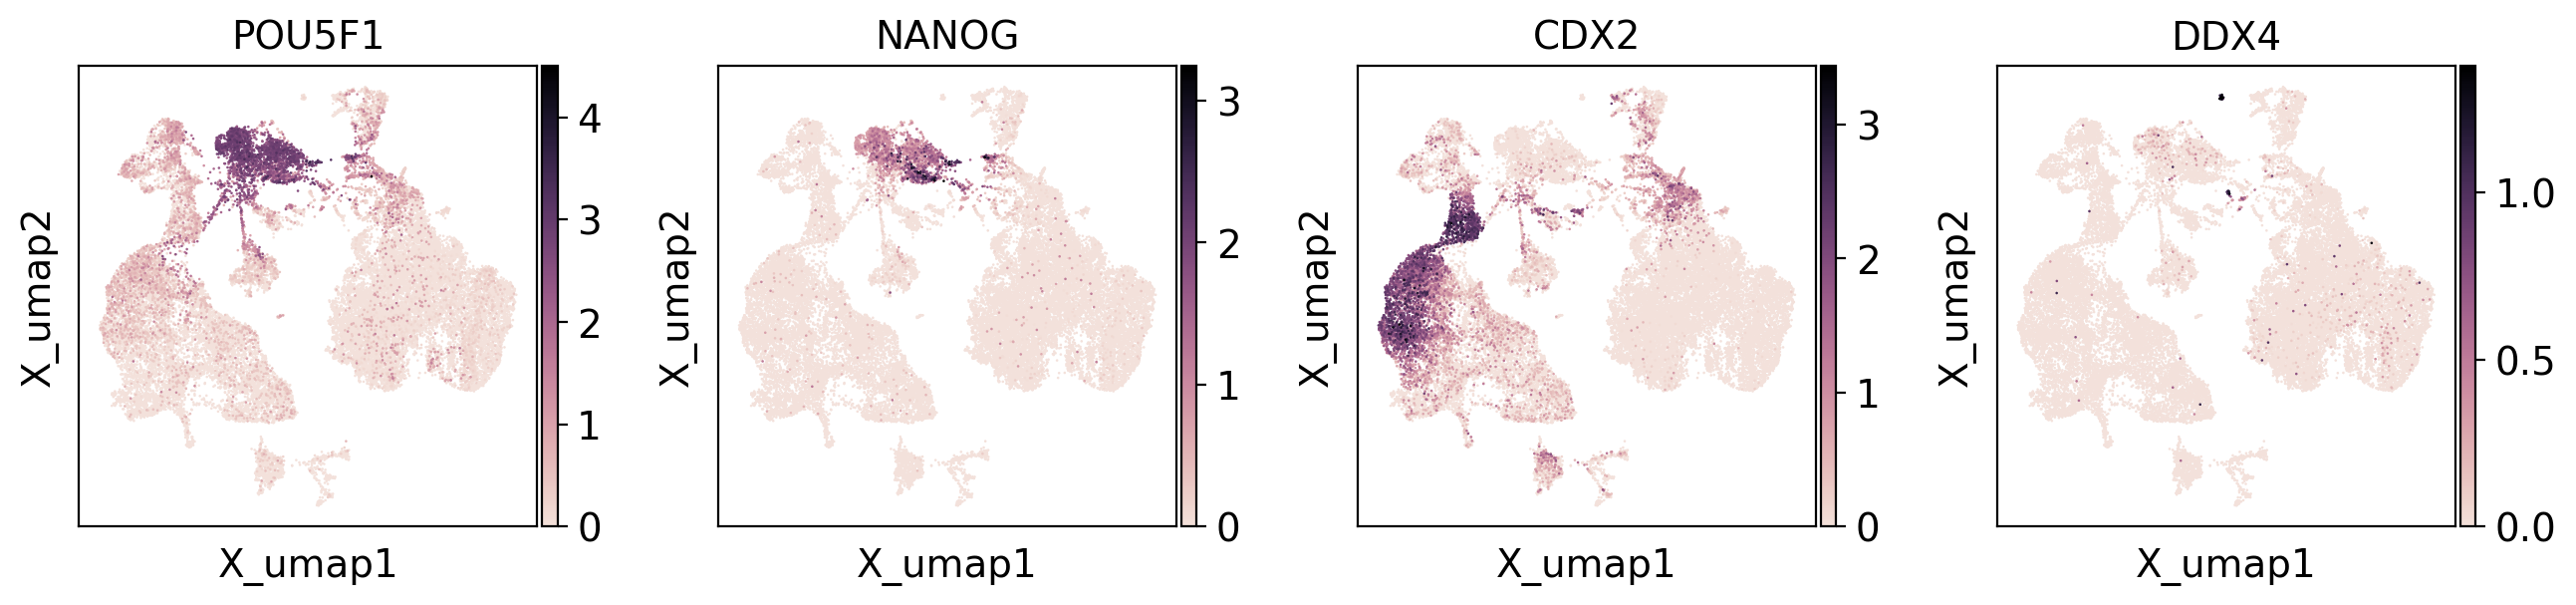

In [29]:
# Define the list of genes you want to plot
genes_to_plot = ["POU5F1","NANOG", "CDX2", "DDX4"]  

# Plot the UMAP embedding for the specified genes
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=genes_to_plot,
    use_raw=False,
    cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True)
)

In [32]:
freq_table = adata.obs.loc[adata.obs["final_anno"].isin(["Epiblast", "Epi_1"]), "stage"].value_counts()
print(freq_table)

E10_IVC    141
E8_IVC      88
6.0         48
7.0         31
E6_IVC      25
E12_IVC     17
E11_IVC     11
E9_IVC       7
E14_IVC      2
E6           0
E13_IVC      0
E7_IVC       0
0.0          0
0.33         0
CS7          0
5.0          0
4.0          0
3.0          0
2.0          0
1.25         0
0.75         0
CS10         0
Name: stage, dtype: int64


In [33]:
# fix anno names
anno_mapping = {
    "Epiblast": "pre-implantation_epi",
    "Primitive Endoderm": "Hypoblast",
    "Trophectoderm": "TE"
}

# Replace values in the final_lineage column
adata.obs["final_anno"] = adata.obs["final_anno"].replace(anno_mapping)

# Print unique values to check the updated categories
print(set(adata.obs["final_anno"]))

{'TE', 'Zygote', 'Epi_2', 'Oocyte', 'YS.Endoderm_2', 'Epi_1', 'Notochord', 'Intermediate mesoderm', 'EVTs_3', 'STBs_2', 'EVTs_4', 'pre-YS.mesoderm', 'Epi_3', 'Exe.endothelium', 'Hypoblast', 'CTBs_1', 'AVE', 'Erythroid', 'Rostral mesoderm', 'STBs_1', 'DE', 'STBs_3', 'Paraxial mesoderm', 'Amniotic_epi', 'Pronucleus', '8C', 'Inner Cell Mass', 'Epi_4', 'Hemogenic endothelial progenitors', 'Morula', '4C', 'Myeloid progenitor', 'EVTs_2', 'Endothelium', 'YS.Endoderm_1', 'VE/YE', 'Nascent mesoderm', 'Primitive.streak', 'Lateral plate mesoderm_5', 'Somite', 'Emergent mesoderm', 'EVTs_1', 'Allantois_2', 'PGC', 'Lateral plate mesoderm_3', 'CTBs_2', 'Cardiac myocyte', 'Ectoderm_2', 'Allantois_1', 'Lateral plate mesoderm_2', 'Ectoderm_1', '2C', 'Neural tube', 'Lateral plate mesoderm_1', 'Neural crest', 'Amnion', 'pre-implantation_epi', 'Lateral plate mesoderm_4', 'Gut', 'pre-somatic mesoderm', 'YS.mesoderm', 'CTBs_3'}


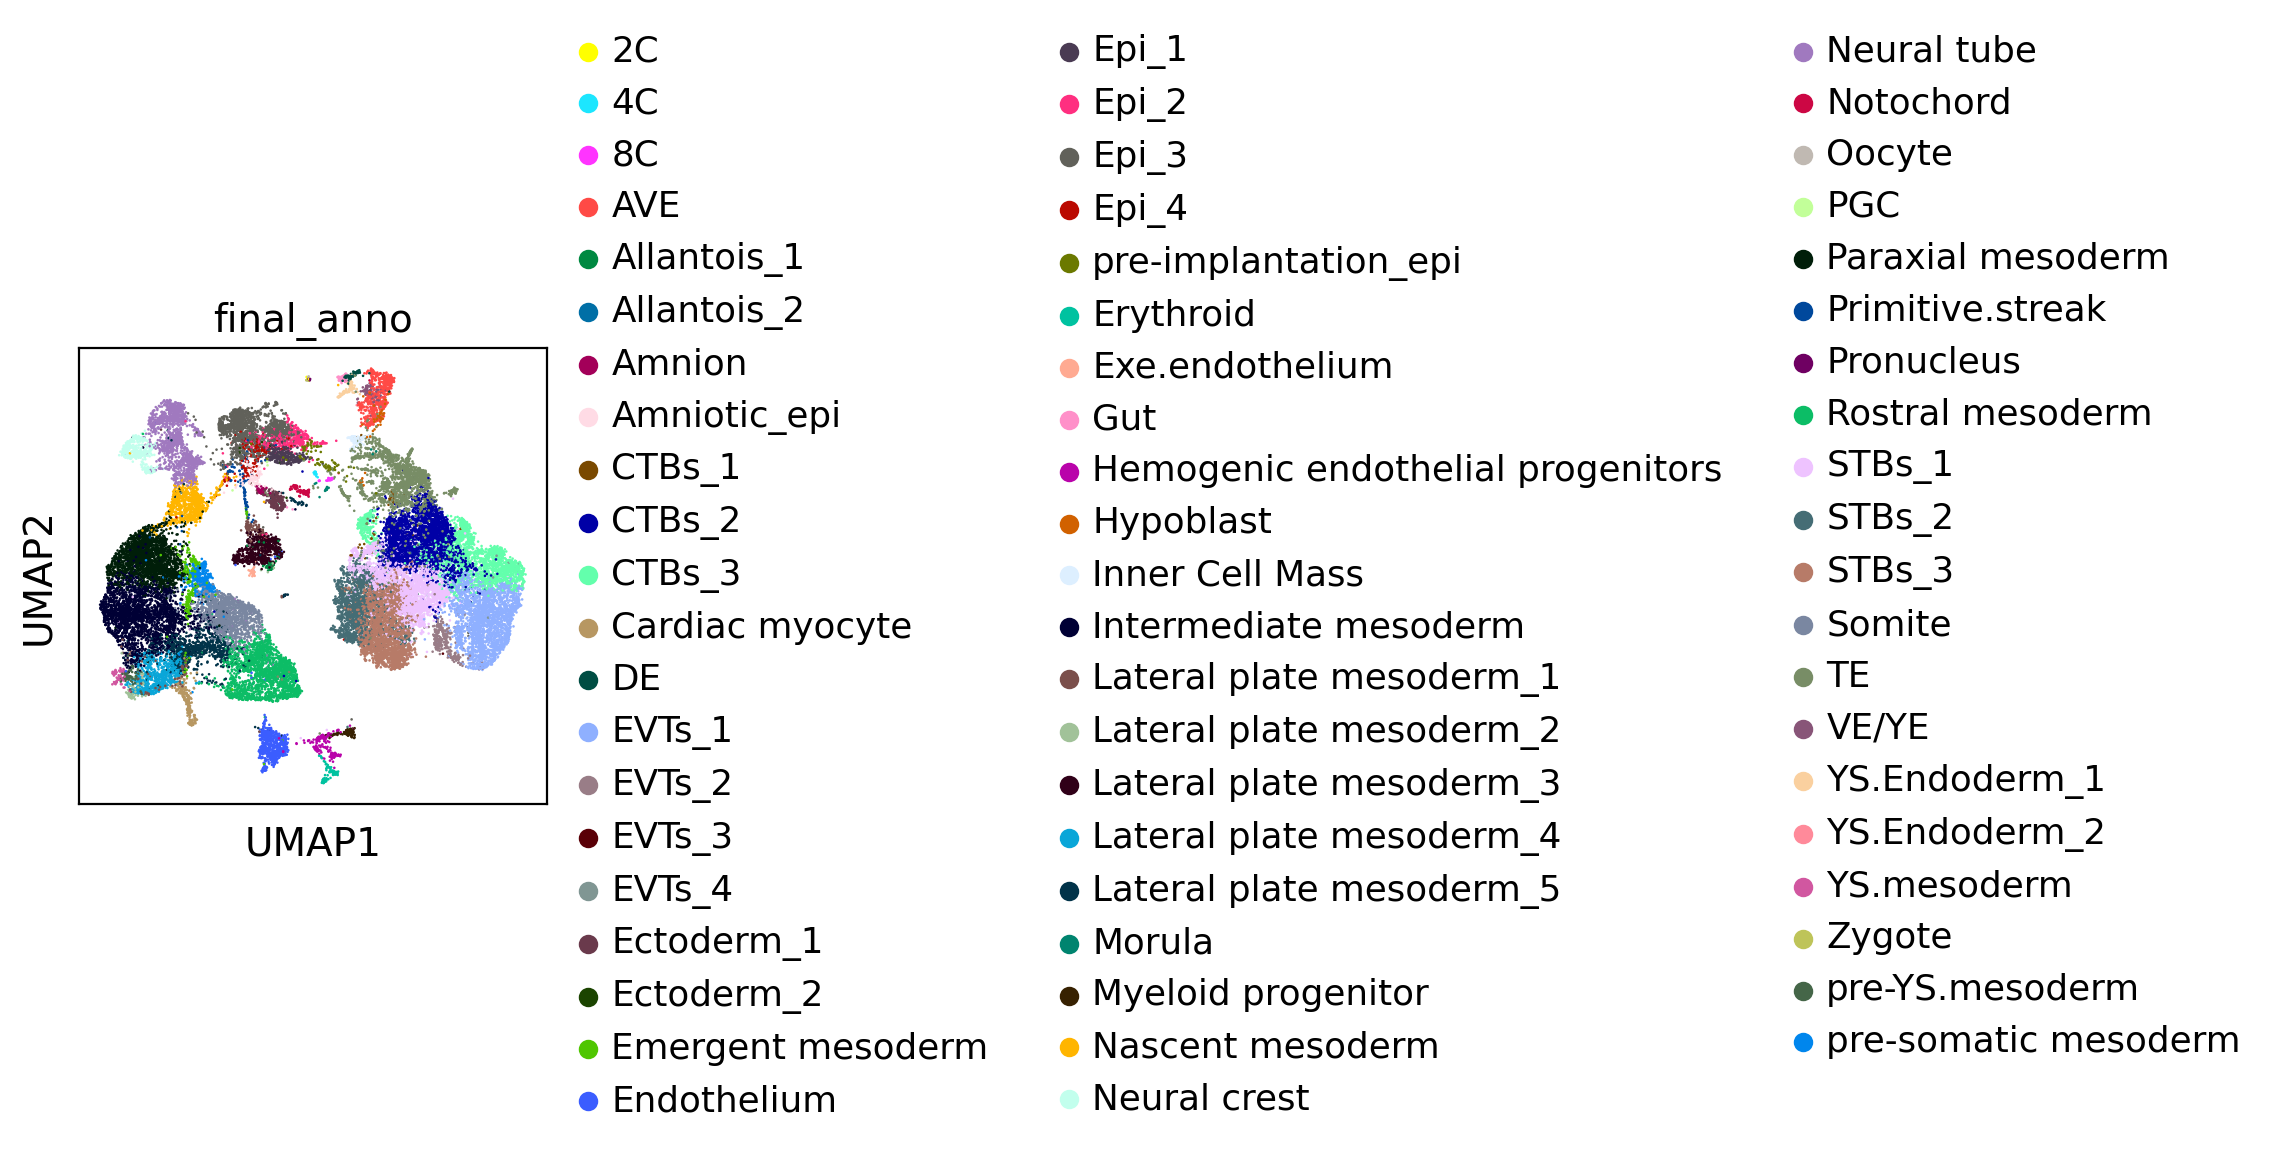

In [34]:
sc.pl.umap(adata, color=['final_anno'])

In [37]:
# Assuming `adata.obs['reanno']` contains your reanno names
reanno_names = set(adata.obs['final_anno'].unique())  # Get unique reanno names as a set

# Your ordered labels list
ordered_labels = [ 'Oocyte', 'Pronucleus', 'Zygote', '2C', '4C', "8C", "Morula", "Inner Cell Mass",
                      'TE','CTBs_1', 'CTBs_2', 'CTBs_3', 'STBs_1', 'STBs_2', 'STBs_3', 'EVTs_1', 'EVTs_2', 'EVTs_3', 'EVTs_4',
                      'pre-implantation_epi', 'Epi_1', 'Epi_2', 'Epi_3','Epi_4',
                      'Allantois_1', 'Allantois_2', 'pre-YS.mesoderm', 'YS.mesoderm',  'Exe.endothelium', 
                      'Amnion', 'Amniotic_epi',  'Ectoderm_1', 'Ectoderm_2',
                      'Neural tube', 'Neural crest',
                      'Primitive.streak', 'Nascent mesoderm','PGC',
                      'Emergent mesoderm', 'Paraxial mesoderm', 'Intermediate mesoderm', 'Lateral plate mesoderm_1',
                      'Lateral plate mesoderm_2', 'Lateral plate mesoderm_3', 'Lateral plate mesoderm_4',
                      'Lateral plate mesoderm_5', 'pre-somatic mesoderm', 'Somite', 'Rostral mesoderm',
                      'Cardiac myocyte', 
                      'Notochord', 'DE', 'Gut',
                      'Hypoblast', 'AVE', 'VE/YE', 'YS.Endoderm_1', 'YS.Endoderm_2', 
                      'Hemogenic endothelial progenitors', 'Endothelium', 'Erythroid', 'Myeloid progenitor'
  ]


# Convert `ordered_labels` list to a set
ordered_labels_set = set(ordered_labels)

# Find names in reanno that are not in ordered_labels
missing_in_ordered = reanno_names.difference(ordered_labels_set)

# Output the results
if len(missing_in_ordered) == 0:
    print("All reanno names are listed in ordered_labels.")
else:
    print("These reanno names are missing in ordered_labels:", missing_in_ordered)


All reanno names are listed in ordered_labels.


In [38]:
# Ensure the 'reanno' column is of type 'category' with the specified order
adata.obs['final_anno'] = pd.Categorical(adata.obs['final_anno'], categories=ordered_labels, ordered=True)

# Verify the changes
print(adata.obs['final_anno'].cat.categories)


Index(['Oocyte', 'Pronucleus', 'Zygote', '2C', '4C', '8C', 'Morula',
       'Inner Cell Mass', 'TE', 'CTBs_1', 'CTBs_2', 'CTBs_3', 'STBs_1',
       'STBs_2', 'STBs_3', 'EVTs_1', 'EVTs_2', 'EVTs_3', 'EVTs_4',
       'pre-implantation_epi', 'Epi_1', 'Epi_2', 'Epi_3', 'Epi_4',
       'Allantois_1', 'Allantois_2', 'pre-YS.mesoderm', 'YS.mesoderm',
       'Exe.endothelium', 'Amnion', 'Amniotic_epi', 'Ectoderm_1', 'Ectoderm_2',
       'Neural tube', 'Neural crest', 'Primitive.streak', 'Nascent mesoderm',
       'PGC', 'Emergent mesoderm', 'Paraxial mesoderm',
       'Intermediate mesoderm', 'Lateral plate mesoderm_1',
       'Lateral plate mesoderm_2', 'Lateral plate mesoderm_3',
       'Lateral plate mesoderm_4', 'Lateral plate mesoderm_5',
       'pre-somatic mesoderm', 'Somite', 'Rostral mesoderm', 'Cardiac myocyte',
       'Notochord', 'DE', 'Gut', 'Hypoblast', 'AVE', 'VE/YE', 'YS.Endoderm_1',
       'YS.Endoderm_2', 'Hemogenic endothelial progenitors', 'Endothelium',
       'Erythroid',

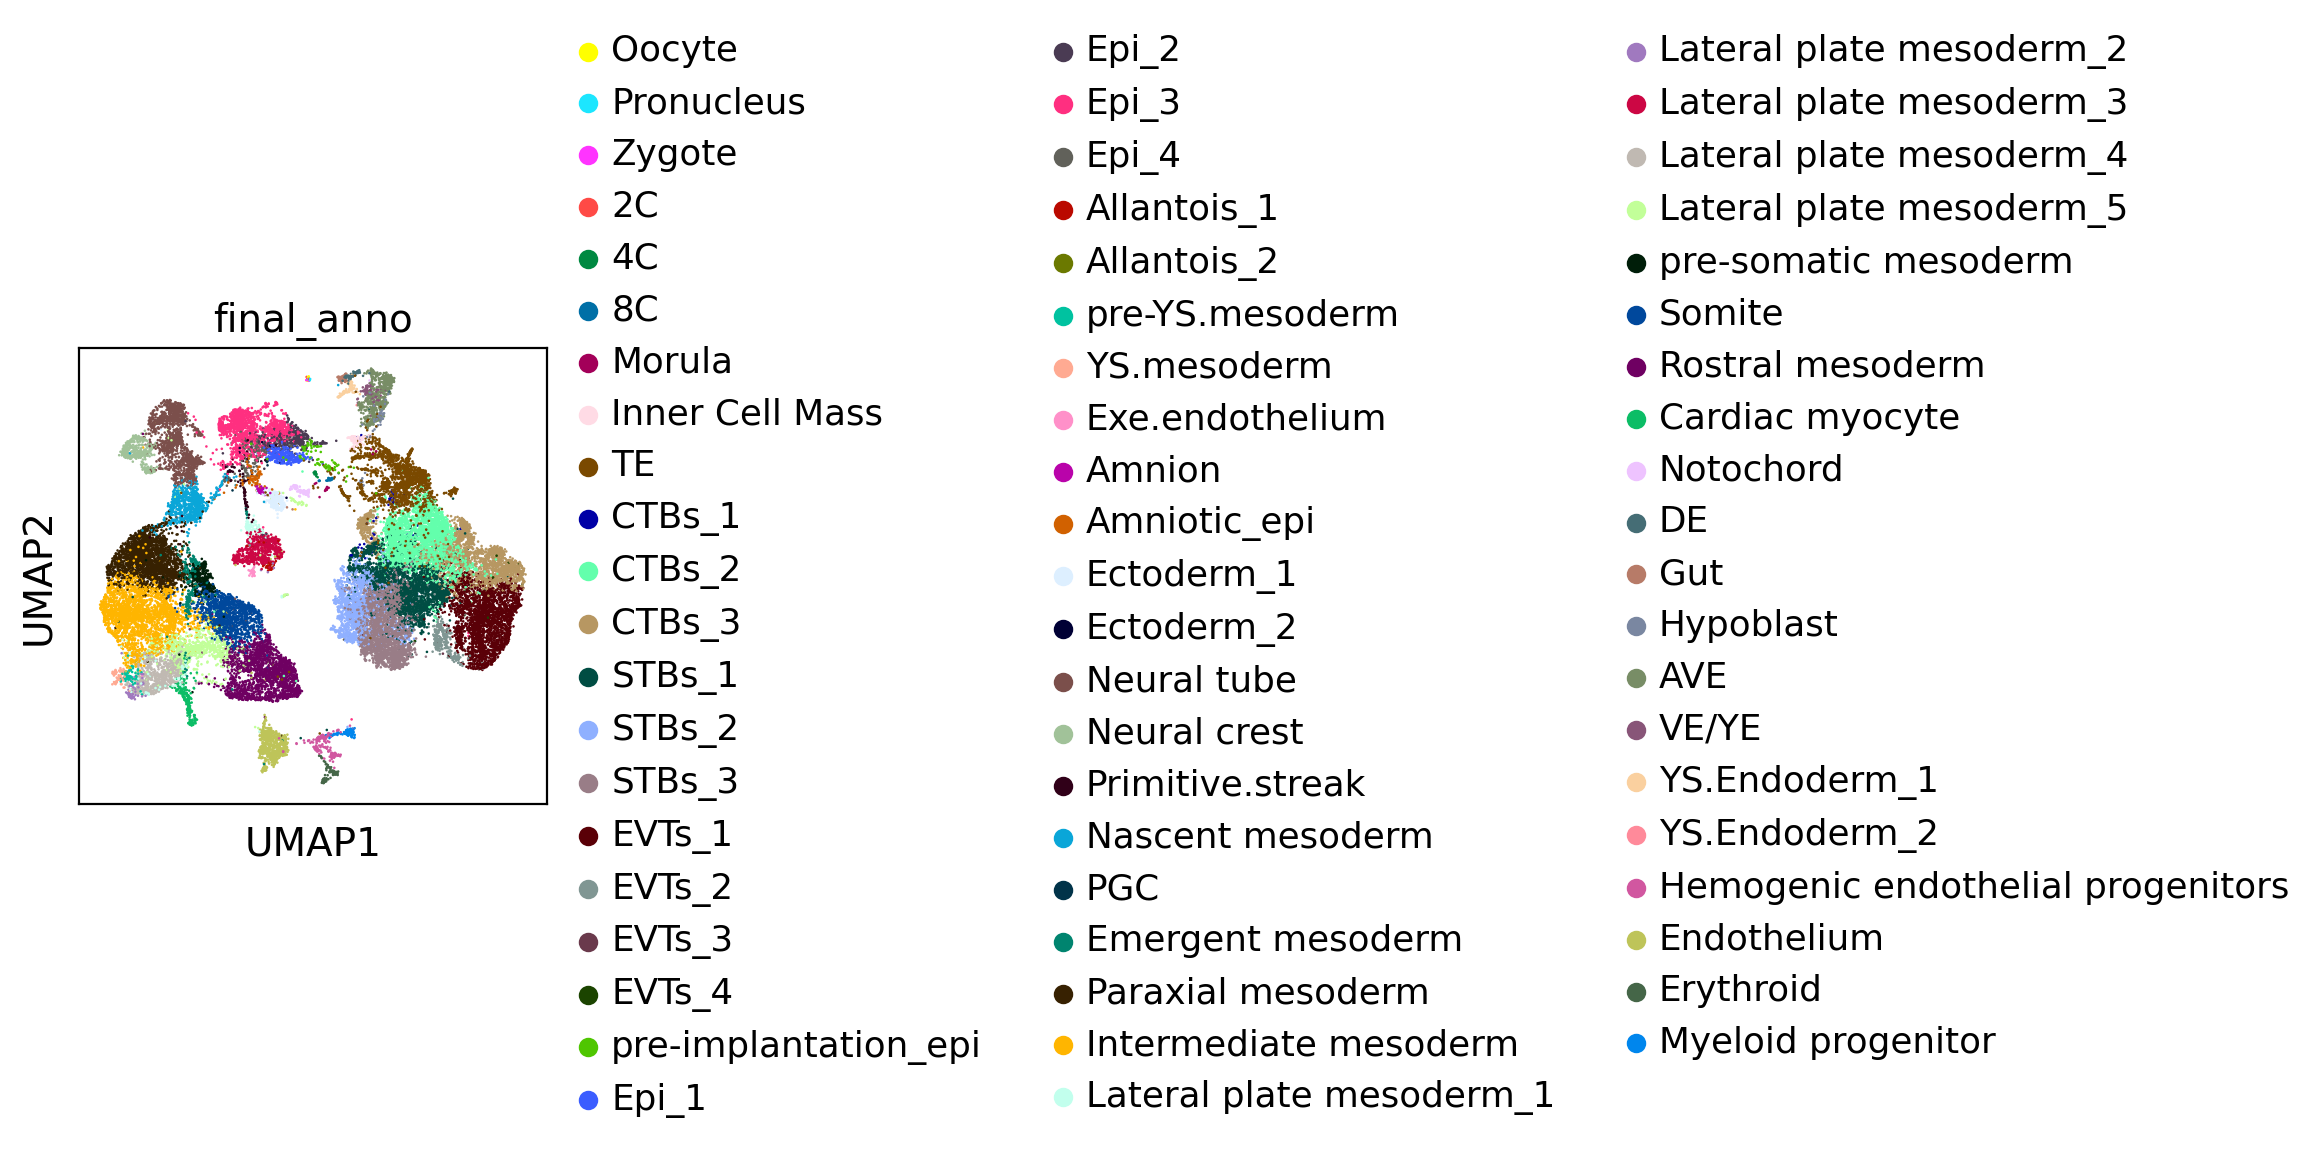

In [39]:
sc.pl.umap(adata, color=['final_anno'])

In [40]:
adata.raw.var.rename(columns={'_index': 'index'}, inplace=True)
adata.write_h5ad(filename="embryo_pre_post_20250310.h5ad")